In [1]:
import numpy as np
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [2]:
pd.options.display.max_columns = 50

In [3]:
uniprot_id = 'P00533'

In [4]:
target_api = new_client.target
molecule_api = new_client.molecule
bioactivity_api = new_client.activity

In [5]:
target = target_api.get(
    target_components__accession=uniprot_id
).only(
    'target_chembl_id',
    'organism',
    'pedf_name',
    'target_type'
)

In [6]:
type(target),len(target)

(chembl_webresource_client.query_set.QuerySet, 8)

In [7]:
type(target[0])

dict

In [8]:
target_df = pd.DataFrame.from_dict(target)
target_df

,organism,target_chembl_id,target_type
0,Homo sapiens,CHEMBL203,SINGLE PROTEIN
1,Homo sapiens,CHEMBL2111431,PROTEIN FAMILY
2,Homo sapiens,CHEMBL2363049,PROTEIN FAMILY
3,Homo sapiens,CHEMBL3137284,CHIMERIC PROTEIN
4,Homo sapiens,CHEMBL4523680,PROTEIN-PROTEIN INTERACTION
5,Homo sapiens,CHEMBL4523747,PROTEIN-PROTEIN INTERACTION
6,Homo sapiens,CHEMBL4523998,PROTEIN-PROTEIN INTERACTION
7,Homo sapiens,CHEMBL4802031,PROTEIN-PROTEIN INTERACTION


In [9]:
chembl_id = target_df.iloc[0]['target_chembl_id']
chembl_id

'CHEMBL203'

In [10]:
bioactivities = bioactivity_api.filter(
    target_chembl_id=chembl_id, type='IC50', relation__in=['<', '<=', '='], assay_type='B'
).only(
    "activity_id",
    "assay_chembl_id",
    "assay_description",
    "assay_type",
    "molecule_chembl_id",
    "type",
    "standard_units",
    "relation",
    "standard_value",
    "target_chembl_id",
    "target_organism"
)

In [11]:
type(bioactivities[0]), len(bioactivities)

(dict, 11485)

In [12]:
type(bioactivities)

chembl_webresource_client.query_set.QuerySet

In [13]:
bioactivities[0]

{'activity_id': 32260,
 'assay_chembl_id': 'CHEMBL674637',
 'assay_description': 'Inhibitory activity towards tyrosine phosphorylation for the epidermal growth factor-receptor kinase',
 'assay_type': 'B',
 'molecule_chembl_id': 'CHEMBL68920',
 'relation': '=',
 'standard_units': 'nM',
 'standard_value': '41.0',
 'target_chembl_id': 'CHEMBL203',
 'target_organism': 'Homo sapiens',
 'type': 'IC50',
 'units': 'uM',
 'value': '0.041'}

In [14]:
bioactivities_df = pd.DataFrame.from_dict(bioactivities)

In [15]:
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,32260,CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,CHEMBL68920,=,nM,41.0,CHEMBL203,Homo sapiens,IC50,uM,0.041
1,32267,CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,CHEMBL69960,=,nM,170.0,CHEMBL203,Homo sapiens,IC50,uM,0.17
2,32680,CHEMBL677833,In vitro inhibition of Epidermal growth factor...,B,CHEMBL137635,=,nM,9300.0,CHEMBL203,Homo sapiens,IC50,uM,9.3
3,32770,CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,CHEMBL306988,=,nM,500000.0,CHEMBL203,Homo sapiens,IC50,uM,500.0
4,32772,CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,CHEMBL66879,=,nM,3000000.0,CHEMBL203,Homo sapiens,IC50,uM,3000.0


In [16]:
bioactivities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11485 entries, 0 to 11484
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   activity_id         11485 non-null  int64 
 1   assay_chembl_id     11485 non-null  object
 2   assay_description   11485 non-null  object
 3   assay_type          11485 non-null  object
 4   molecule_chembl_id  11485 non-null  object
 5   relation            11485 non-null  object
 6   standard_units      11485 non-null  object
 7   standard_value      11484 non-null  object
 8   target_chembl_id    11485 non-null  object
 9   target_organism     11485 non-null  object
 10  type                11485 non-null  object
 11  units               11485 non-null  object
 12  value               11484 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


In [17]:
backup = bioactivities_df.copy()

In [18]:
bioactivities_df = backup.copy()

In [19]:
bioactivities_df.drop(columns=['units', 'value'], inplace=True)

In [20]:
bioactivities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11485 entries, 0 to 11484
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   activity_id         11485 non-null  int64 
 1   assay_chembl_id     11485 non-null  object
 2   assay_description   11485 non-null  object
 3   assay_type          11485 non-null  object
 4   molecule_chembl_id  11485 non-null  object
 5   relation            11485 non-null  object
 6   standard_units      11485 non-null  object
 7   standard_value      11484 non-null  object
 8   target_chembl_id    11485 non-null  object
 9   target_organism     11485 non-null  object
 10  type                11485 non-null  object
dtypes: int64(1), object(10)
memory usage: 987.1+ KB


In [21]:
bioactivities_df['standard_units'].unique()

array(['nM', 'ug.mL-1', '/uM'], dtype=object)

In [22]:
bioactivities_df = bioactivities_df[bioactivities_df['standard_units'] == 'nM']

In [23]:
bioactivities_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11416 entries, 0 to 11484
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   activity_id         11416 non-null  int64 
 1   assay_chembl_id     11416 non-null  object
 2   assay_description   11416 non-null  object
 3   assay_type          11416 non-null  object
 4   molecule_chembl_id  11416 non-null  object
 5   relation            11416 non-null  object
 6   standard_units      11416 non-null  object
 7   standard_value      11415 non-null  object
 8   target_chembl_id    11416 non-null  object
 9   target_organism     11416 non-null  object
 10  type                11416 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.0+ MB


In [24]:
bioactivities_df.rename(columns={'standard_units': 'units', 'standard_value': 'IC50'}, inplace=True)

In [25]:
bioactivities_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11416 entries, 0 to 11484
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   activity_id         11416 non-null  int64 
 1   assay_chembl_id     11416 non-null  object
 2   assay_description   11416 non-null  object
 3   assay_type          11416 non-null  object
 4   molecule_chembl_id  11416 non-null  object
 5   relation            11416 non-null  object
 6   units               11416 non-null  object
 7   IC50                11415 non-null  object
 8   target_chembl_id    11416 non-null  object
 9   target_organism     11416 non-null  object
 10  type                11416 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.0+ MB


In [26]:
bioactivities_df['IC50'] = bioactivities_df['IC50'].astype('float')

In [27]:
bioactivities_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11416 entries, 0 to 11484
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   activity_id         11416 non-null  int64  
 1   assay_chembl_id     11416 non-null  object 
 2   assay_description   11416 non-null  object 
 3   assay_type          11416 non-null  object 
 4   molecule_chembl_id  11416 non-null  object 
 5   relation            11416 non-null  object 
 6   units               11416 non-null  object 
 7   IC50                11415 non-null  float64
 8   target_chembl_id    11416 non-null  object 
 9   target_organism     11416 non-null  object 
 10  type                11416 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.0+ MB


In [28]:
bioactivities_df.dropna(axis='index', how='any', inplace=True)

In [29]:
bioactivities_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11415 entries, 0 to 11484
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   activity_id         11415 non-null  int64  
 1   assay_chembl_id     11415 non-null  object 
 2   assay_description   11415 non-null  object 
 3   assay_type          11415 non-null  object 
 4   molecule_chembl_id  11415 non-null  object 
 5   relation            11415 non-null  object 
 6   units               11415 non-null  object 
 7   IC50                11415 non-null  float64
 8   target_chembl_id    11415 non-null  object 
 9   target_organism     11415 non-null  object 
 10  type                11415 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.0+ MB


In [30]:
bioactivities_df.drop_duplicates(subset='molecule_chembl_id', inplace=True)

In [31]:
bioactivities_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7495 entries, 0 to 11449
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   activity_id         7495 non-null   int64  
 1   assay_chembl_id     7495 non-null   object 
 2   assay_description   7495 non-null   object 
 3   assay_type          7495 non-null   object 
 4   molecule_chembl_id  7495 non-null   object 
 5   relation            7495 non-null   object 
 6   units               7495 non-null   object 
 7   IC50                7495 non-null   float64
 8   target_chembl_id    7495 non-null   object 
 9   target_organism     7495 non-null   object 
 10  type                7495 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 702.7+ KB


In [32]:
bioactivities_df.reset_index(drop=True, inplace=True)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,units,IC50,target_chembl_id,target_organism,type
0,32260,CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,CHEMBL68920,=,nM,41.0,CHEMBL203,Homo sapiens,IC50
1,32267,CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,CHEMBL69960,=,nM,170.0,CHEMBL203,Homo sapiens,IC50
2,32680,CHEMBL677833,In vitro inhibition of Epidermal growth factor...,B,CHEMBL137635,=,nM,9300.0,CHEMBL203,Homo sapiens,IC50
3,32770,CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,CHEMBL306988,=,nM,500000.0,CHEMBL203,Homo sapiens,IC50
4,32772,CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,CHEMBL66879,=,nM,3000000.0,CHEMBL203,Homo sapiens,IC50


In [33]:
len(bioactivities_df)

7495

In [34]:
ids = list(bioactivities_df['molecule_chembl_id'])

In [35]:
molecules = molecule_api.filter(molecule_chembl_id__in=ids).only(
    'molecule_chembl_id',
    'molecule_structures'
)

In [36]:
len(molecules), type(molecules)

(7495, chembl_webresource_client.query_set.QuerySet)

In [37]:
molecules[0]

{'molecule_chembl_id': 'CHEMBL6246',
 'molecule_structures': {'canonical_smiles': 'O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23',
  'molfile': '\n     RDKit          2D\n\n 22 25  0  0  0  0  0  0  0  0999 V2000\n   -0.4750   -0.2417    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.5750    0.3583    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.4750   -1.4792    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.5750    1.6000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5333    0.3583    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6292   -0.2417    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.5750   -2.0875    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.4750    2.2083    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5333    1.6000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6292   -1.4792    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6292    2.2083    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.53

In [38]:
type(molecules[0])

dict

In [47]:
molecules_df = pd.DataFrame.from_dict(molecules)

In [48]:
molecules_df.head()

,molecule_chembl_id,molecule_structures
0,CHEMBL6246,{'canonical_smiles': 'O=c1oc2c(O)c(O)cc3c(=O)o...
1,CHEMBL10,{'canonical_smiles': 'C[S+]([O-])c1ccc(-c2nc(-...
2,CHEMBL6976,{'canonical_smiles': 'COc1cc2c(cc1OC)Nc1ncn(C)...
3,CHEMBL7002,{'canonical_smiles': 'CC1(COc2ccc(CC3SC(=O)NC3...
4,CHEMBL414013,{'canonical_smiles': 'COc1cc2c(cc1OC)Nc1ncnc(O...


In [49]:
molecules_df.shape

(7495, 2)

In [51]:
molecules_df.dropna(axis='index', how='any', inplace=True)
molecules_df.shape

(7488, 2)

In [52]:
smiles_list = []
for _, strucuture in molecules_df.iterrows():
    try:
        smiles_list.append(strucuture['molecule_structures']['canonical_smiles'])
    except KeyError:
        smiles_list.append(None)

molecules_df['smiles'] = smiles_list

In [53]:
molecules_df.head()

,molecule_chembl_id,molecule_structures,smiles
0,CHEMBL6246,{'canonical_smiles': 'O=c1oc2c(O)c(O)cc3c(=O)o...,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23
1,CHEMBL10,{'canonical_smiles': 'C[S+]([O-])c1ccc(-c2nc(-...,C[S+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc...
2,CHEMBL6976,{'canonical_smiles': 'COc1cc2c(cc1OC)Nc1ncn(C)...,COc1cc2c(cc1OC)Nc1ncn(C)c(=O)c1C2
3,CHEMBL7002,{'canonical_smiles': 'CC1(COc2ccc(CC3SC(=O)NC3...,CC1(COc2ccc(CC3SC(=O)NC3=O)cc2)CCCCC1
4,CHEMBL414013,{'canonical_smiles': 'COc1cc2c(cc1OC)Nc1ncnc(O...,COc1cc2c(cc1OC)Nc1ncnc(O)c1C2


In [55]:
molecules_df.drop(columns='molecule_structures', inplace=True)

In [56]:
molecules_df.shape

(7488, 2)

In [57]:
molecules_df.head()

,molecule_chembl_id,smiles
0,CHEMBL6246,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23
1,CHEMBL10,C[S+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc...
2,CHEMBL6976,COc1cc2c(cc1OC)Nc1ncn(C)c(=O)c1C2
3,CHEMBL7002,CC1(COc2ccc(CC3SC(=O)NC3=O)cc2)CCCCC1
4,CHEMBL414013,COc1cc2c(cc1OC)Nc1ncnc(O)c1C2


In [59]:
bioactivities_df.columns

Index(['activity_id', 'assay_chembl_id', 'assay_description', 'assay_type',
       'molecule_chembl_id', 'relation', 'units', 'IC50', 'target_chembl_id',
       'target_organism', 'type'],
      dtype='object')

In [61]:
output_df = pd.merge(
    left=bioactivities_df[['molecule_chembl_id', 'IC50', 'units', ]],
    right=molecules_df,
    on='molecule_chembl_id')

In [62]:
output_df.head()

,molecule_chembl_id,IC50,units,smiles
0,CHEMBL68920,41.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
1,CHEMBL69960,170.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
2,CHEMBL137635,9300.0,nM,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12
3,CHEMBL306988,500000.0,nM,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1
4,CHEMBL66879,3000000.0,nM,O=C(O)/C=C/c1ccc(O)cc1


In [63]:
output_df['pIC50'] = output_df['IC50'].apply(lambda x: -np.log10(x * 1e-09))

In [65]:
output_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL68920,41.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7.387216
1,CHEMBL69960,170.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,6.769551
2,CHEMBL137635,9300.0,nM,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,5.031517
3,CHEMBL306988,500000.0,nM,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,3.301030
4,CHEMBL66879,3000000.0,nM,O=C(O)/C=C/c1ccc(O)cc1,2.522879


array([[<Axes: title={'center': 'pIC50'}>]], dtype=object)

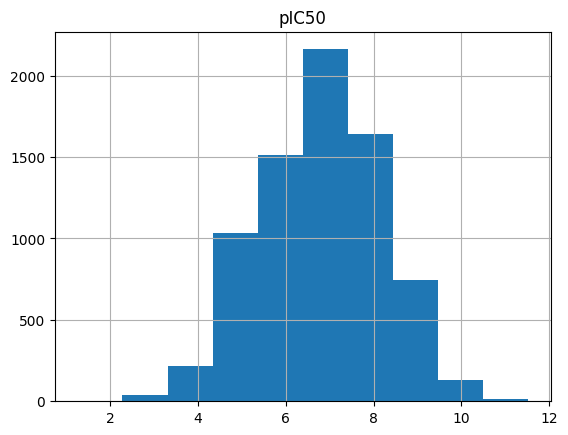

In [66]:
output_df.hist(column='pIC50')

In [67]:
output_df.reset_index(drop=True, inplace=True)

In [68]:
output_df.to_csv('data/EGFR_compounds_2.csv')

In [69]:
output_df.shape

(7488, 5)

In [72]:
target_full = target_api.get(
    target_components__accession=uniprot_id
)

In [73]:
full_target_df = pd.DataFrame(target_full)

In [74]:
full_target_df

,cross_references,organism,pref_name,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P00533', 'xref_name': None, 'xre...",Homo sapiens,Epidermal growth factor receptor erbB1,False,CHEMBL203,"[{'accession': 'P00533', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,False,CHEMBL2111431,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
2,[],Homo sapiens,Epidermal growth factor receptor,False,CHEMBL2363049,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
3,[],Homo sapiens,MER intracellular domain/EGFR extracellular do...,False,CHEMBL3137284,"[{'accession': 'P00533', 'component_descriptio...",CHIMERIC PROTEIN,9606
4,[],Homo sapiens,Protein cereblon/Epidermal growth factor receptor,False,CHEMBL4523680,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
5,[],Homo sapiens,EGFR/PPP1CA,False,CHEMBL4523747,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
6,[],Homo sapiens,VHL/EGFR,False,CHEMBL4523998,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
7,[],Homo sapiens,Baculoviral IAP repeat-containing protein 2/Ep...,False,CHEMBL4802031,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606


In [75]:
bio_full = bioactivity_api.filter(
    target_chembl_id=chembl_id, type='IC50', relation__in=['<', '<=', '='], assay_type='B'
)

In [77]:
bio_full[0]

{'action_type': None,
 'activity_comment': None,
 'activity_id': 32260,
 'activity_properties': [],
 'assay_chembl_id': 'CHEMBL674637',
 'assay_description': 'Inhibitory activity towards tyrosine phosphorylation for the epidermal growth factor-receptor kinase',
 'assay_type': 'B',
 'assay_variant_accession': None,
 'assay_variant_mutation': None,
 'bao_endpoint': 'BAO_0000190',
 'bao_format': 'BAO_0000357',
 'bao_label': 'single protein format',
 'canonical_smiles': 'Cc1cc(C)c(/C=C2\\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)c32)[nH]1',
 'data_validity_comment': None,
 'data_validity_description': None,
 'document_chembl_id': 'CHEMBL1134862',
 'document_journal': 'Bioorg Med Chem Lett',
 'document_year': 2002,
 'ligand_efficiency': {'bei': '19.25',
  'le': '0.37',
  'lle': '2.94',
  'sei': '8.93'},
 'molecule_chembl_id': 'CHEMBL68920',
 'molecule_pref_name': None,
 'parent_molecule_chembl_id': 'CHEMBL68920',
 'pchembl_value': '7.39',
 'potential_duplicate': 0,
 'qudt_units': 'http://www.openphacts

In [82]:
full_bio_df = pd.DataFrame.from_records(bio_full, nrows=1)

In [83]:
full_bio_df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,None,None,CHEMBL1134862,Bioorg Med Chem Lett,2002,"{'bei': '19.25', 'le': '0.37', 'lle': '2.94', ...",CHEMBL68920,None,CHEMBL68920,7.39,0,http://www.openphacts.org/units/Nanomolar,119482,=,1,1,=,None,IC50,nM,None,41.0,CHEMBL203,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041


In [84]:
full_molecules = molecule_api.filter(
    molecule_chembl_id=ids[0]
)

In [85]:
full_molecules_df = pd.DataFrame(full_molecules)

In [86]:
full_molecules_df

,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chemical_probe,chirality,cross_references,dosed_ingredient,first_approval,first_in_class,helm_notation,indication_class,inorganic_flag,max_phase,molecule_chembl_id,molecule_hierarchy,molecule_properties,molecule_structures,molecule_synonyms,molecule_type,natural_product,oral,orphan,parenteral,polymer_flag,pref_name,prodrug,structure_type,therapeutic_flag,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_flag
0,[],-1,None,0,None,0,-1,[],False,None,-1,None,None,-1,None,CHEMBL68920,"{'active_chembl_id': 'CHEMBL68920', 'molecule_...","{'alogp': '4.45', 'aromatic_rings': 3, 'cx_log...",{'canonical_smiles': 'Cc1cc(C)c(/C=C2\C(=O)Nc3...,[],Small molecule,0,False,-1,False,0,None,-1,MOL,False,False,None,None,None,None,False
